# Statistic

includes :

In [2]:
import json
import random
import gzip
import os
import matplotlib.pyplot as plt
import numpy as np
import statistics
import csv
from itertools import groupby
from datetime import datetime
from math import floor

Generate csv :

In [80]:
tracesPath='./clusterdata-2011-2'
tasksNums = range(0,500)

tasksFiles=list(map(lambda x:tracesPath+'/task_events/part-'+str(x).zfill(5)+'-of-00500.csv.gz', tasksNums))

print (tasksFiles[0])
print ('to')
print (tasksFiles[-1])

./clusterdata-2011-2/task_events/part-00000-of-00500.csv.gz
to
./clusterdata-2011-2/task_events/part-00499-of-00500.csv.gz


In [81]:
def genJobs(taskfiles, pathCSV):
    tasks={}
    arrival=[]
    current_time=0
    
    f = open(pathCSV,'a')
    writer = csv.writer(f)
    
    def task_complete(jID, tID):
        (res, prio, evts) = tasks[(jID, tID)]
        if len(evts) < 3:
            #bad_tasks.append((jID, tID))
            pass
        else:
            subtime=evts[0][1] #timestamp du debut
            runtime=evts[1][1] #event du lancement de la tache
            endtime=evts[-1][1] #fin de la tache
            
            if evts[-1][0]==4 and res!=0.0:        
                
                #temps en seconde
                subt=subtime/1000000.0
                #temps maximun
                walltime=float(endtime-runtime)/1000000.0

                writer.writerow([floor(subt),floor(walltime),res])

                #job={}
                #job['res'] = res
                #job['subtime'] = floor(subt)
                #job['time'] = floor(walltime)

                #jobs.append(job)
                

                del tasks[(jID, tID)]
    
    for f in tasksFiles:
        print('File: ', f)
        with gzip.open(f, 'rb') as f:
            for line in f.readlines():
                
                """
                1. timestamp
                2. missing info
                3. job ID
                4. task index - within the job
                5. machine ID
                6. event type
                7. user name
                8. scheduling class
                9. priority
                10. resource request for CPU cores
                11. resource request for RAM
                12. resource request for local disk space
                13. different-machine constraint
                """
                
                (timestamp,_,jID,tID,_,evtType,_,_,prio,res,_,_,_)=line.decode("ascii").split(',')
                try:
                    # début de la tache
                    if(evtType == '0'):
                        timestamp=int(timestamp)
                        #on récupère la class, la prio, et le temps depuis le début, qu'on stock
                        tasks[(int(jID), int(tID))] = (float(res), int(prio), [(0,int(timestamp))])
                        #on actualise le temps
                        if timestamp>0:
                            arrival.append(timestamp-current_time)
                            current_time=timestamp
                            
                    # event de la tache en cours        
                    else:

                        timestamp, jID, tID, evtType = int(timestamp), int(jID), int(tID), int(evtType)
                        
                        if evtType == 4 or evtType == 5 or evtType == 1:
                            (_,_, events)=tasks[(jID,tID)]
                            #on rajoute le timestamp de l'evenement
                            events.append((evtType,timestamp))
                        
                        #fin de la tache
                        if evtType == 4 or evtType == 5:
                            task_complete(jID, tID)
                            
                except:
                    pass
        
    f.close()
    
                

In [ ]:
csvPath = "./data500.csv"
if os.path.isfile(csvPath):
    os.remove("data500.csv")

genJobs(tasksFiles,csvPath)

File:  ./clusterdata-2011-2/task_events/part-00000-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00001-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00002-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00003-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00004-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00005-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00006-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00007-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00008-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00009-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00010-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00011-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00012-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00013-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00014-of-00500.cs

File:  ./clusterdata-2011-2/task_events/part-00123-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00124-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00125-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00126-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00127-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00128-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00129-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00130-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00131-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00132-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00133-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00134-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00135-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00136-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00137-of-00500.cs

File:  ./clusterdata-2011-2/task_events/part-00246-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00247-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00248-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00249-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00250-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00251-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00252-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00253-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00254-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00255-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00256-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00257-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00258-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00259-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00260-of-00500.cs

File:  ./clusterdata-2011-2/task_events/part-00369-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00370-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00371-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00372-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00373-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00374-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00375-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00376-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00377-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00378-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00379-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00380-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00381-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00382-of-00500.csv.gz
File:  ./clusterdata-2011-2/task_events/part-00383-of-00500.cs

load from csv:

In [3]:
data = np.genfromtxt('data500.csv', delimiter=',')

data.view(dtype=[('f1',np.float64),('f2',np.float64),('f3',np.float64)]).sort(order=['f1'], axis=0)

load from workload :

In [7]:
workloadpath = 'workloads/workload.json'

with open(workloadpath) as json_file:
    dataJ = json.load(json_file)

data = np.array([[jobs['subtime'],jobs['res'],jobs['walltime']//2] for jobs in dataJ['jobs']])

data.view(dtype=[('f1',np.float64),('f2',np.float64),('f3',np.float64)]).sort(order=['f1'], axis=0)

Statistic :

In [8]:
plt.figure()
print(len(data))

print(data[:,0].mean())
print(data[:,1].mean())
print(data[:,2].mean())

print("temps entre deux taches:")
print(data[-1][0]/len(data))


3611
238915.83439490446
4.256992522846857
1779.1104957075602
temps entre deux taches:
138.44724453060095


<Figure size 432x288 with 0 Axes>

In [5]:
dataSub = np.array([np.array(list(v)) for i, v in groupby(data, lambda x: x[0])])

In [6]:
print(dataSub.shape[0])
#print(dataSub)

dataSum = np.empty((dataSub.shape[0],3), float)
dataMean = np.empty((dataSub.shape[0],3), float)
y=0
for i in dataSub:
    dataSum[y]=np.array([[i[0][0],np.sum(i[:,1]),np.sum(i[:,2])]])
    dataMean[y]=np.array([[i[0][0],np.mean(i[:,1]),np.mean(i[:,2])]])
    y+=1


263


In [40]:
m=1
y=1
dataMeanReduit = np.empty(((len(dataMean)-m)//(2*m+1),3), float)

for i in range(0,(len(dataMean)-m)//(2*m+1)):
    dataMeanReduit[i] = np.array([[np.mean(dataMean[y-1:y+1,0]),np.mean(dataMean[y-1:y+1,1]),np.mean(dataMean[y-1:y+1,2])]])
    y+=2*m+1

In [32]:
m = 1
dataMeanReduitFiltre = np.empty((len(dataMeanReduit)-2*m,3), float)

#filtre moyenne
for i in range(m,len(dataMeanReduit)-m):
    dataMeanReduitFiltre[i-m][0]=np.mean(dataMeanReduit[i][0])
    dataMeanReduitFiltre[i-m][1]=np.mean(dataMeanReduit[i-m:i+m+1,1])
    dataMeanReduitFiltre[i-m][2]=np.mean(dataMeanReduit[i-m:i+m+1,2])

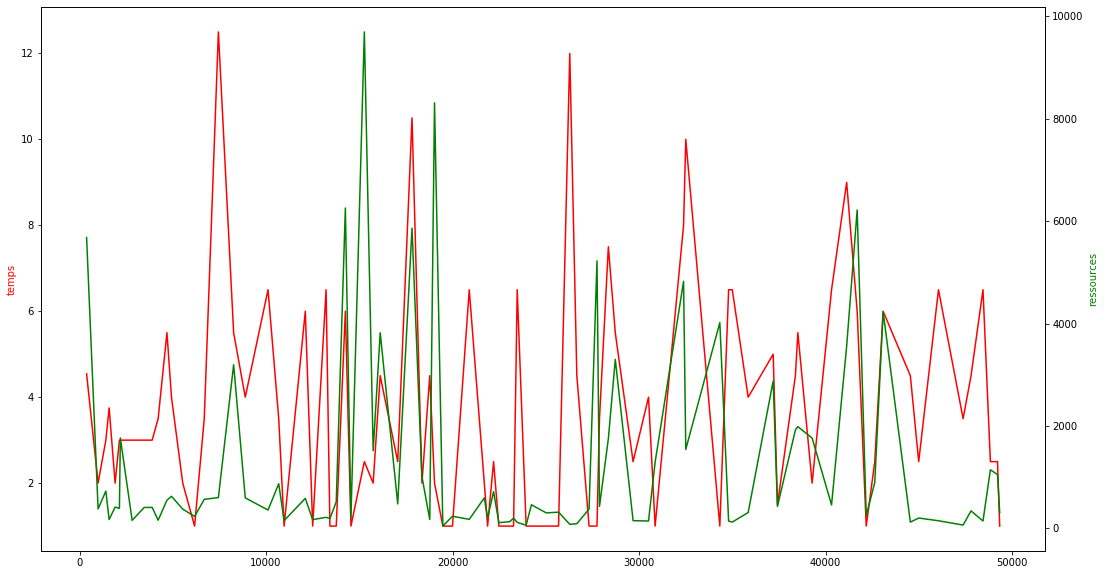

In [41]:


fig, ax1 = plt.subplots()

ax1.set_ylabel('temps', color='red')
ax1.plot(dataMeanReduit[:,0],dataMeanReduit[:,1],color='red')


ax2 = ax1.twinx() 

ax2.set_ylabel('ressources', color='green')
ax2.plot(dataMeanReduit[:,0],dataMeanReduit[:,2],color='green')

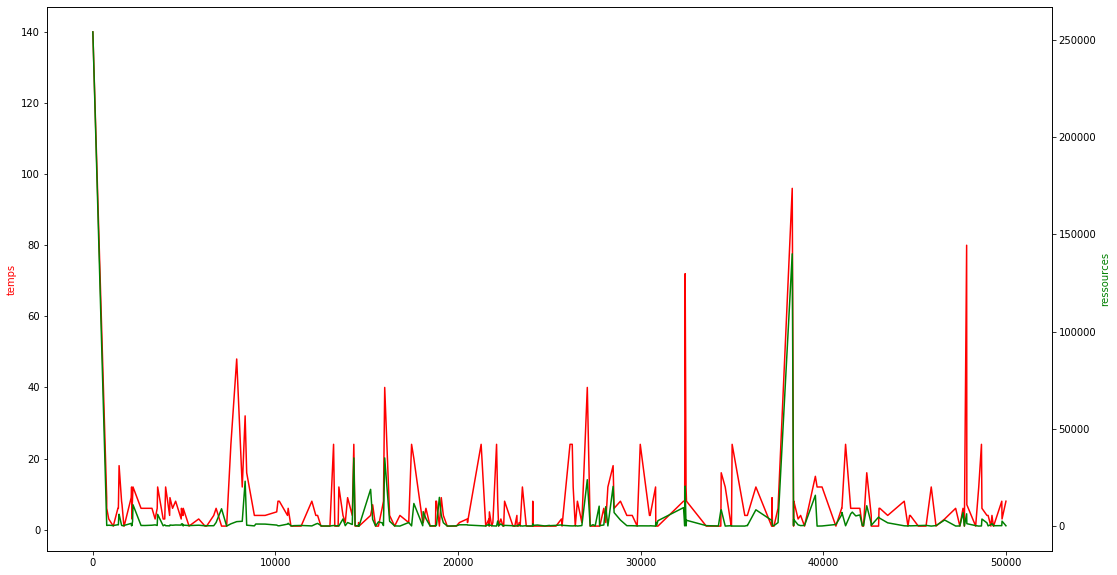

In [42]:
plt.rcParams["figure.figsize"] = (18,10)
np.set_printoptions(suppress=True)

fig, ax1 = plt.subplots()

ax1.set_ylabel('temps', color='red')
ax1.plot(dataSum[:,0],dataSum[:,1],color='red')

ax2 = ax1.twinx() 

ax2.set_ylabel('ressources', color='green')
ax2.plot(dataSum[:,0],dataSum[:,2],color='green')

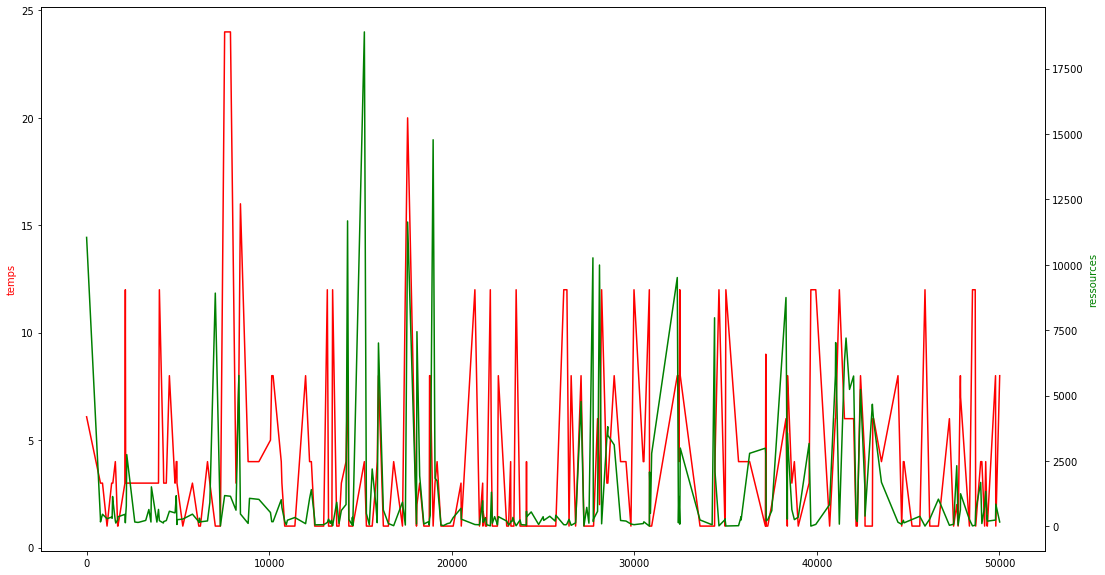

In [43]:


fig, ax1 = plt.subplots()

ax1.set_ylabel('temps', color='red')
ax1.plot(dataMean[:,0],dataMean[:,1],color='red')


ax2 = ax1.twinx() 

ax2.set_ylabel('ressources', color='green')
ax2.plot(dataMean[:,0],dataMean[:,2],color='green')

Text(0, 0.5, 'Nombre de taches')

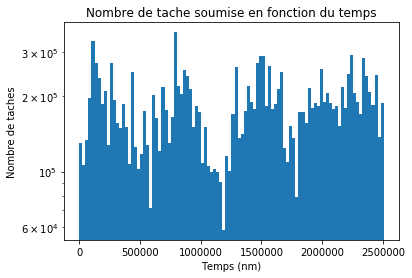

In [208]:
plt.title('Nombre de tache soumise en fonction du temps')
plt.yscale('log', nonposy='clip')
plt.hist(data[:,0],100)
plt.xlabel('Temps (nm)')
plt.ylabel('Nombre de taches')

Text(0, 0.5, 'Nombre de taches')

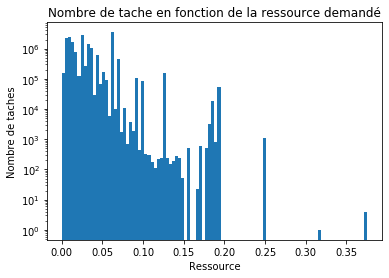

In [209]:
plt.title('Nombre de tache en fonction de la ressource demandé')
plt.yscale('log', nonposy='clip')
plt.hist(data[:,2],100)
plt.xlabel('Ressource')
plt.ylabel('Nombre de taches')

Text(0, 0.5, 'Nombre de taches')

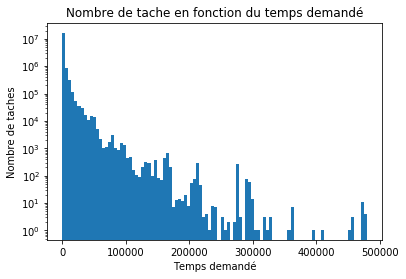

In [210]:
plt.title('Nombre de tache en fonction du temps demandé')
plt.yscale('log', nonposy='clip')
plt.hist(data[:,1],100)
plt.xlabel('Temps demandé')
plt.ylabel('Nombre de taches')